# Problem Statement: lung cancer Survival Prediction by machine learning¶

# Description:

### Lung cancer is a type of cancer that originates in the cells of the lungs. It is a malignant tumor that starts in the lung tissues and can grow and spread to other parts of the body. 

# 1. Importing Libraries 

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
#Data Pipline
from sklearn.pipeline import Pipeline
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report
#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
# metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import warnings

# 2. Load dataset:

In [87]:
data1=pd.read_csv("lung cancer1 .csv")

In [88]:
data1


,Treatment,Cell type,Numdays,Karnofsky score,Months,Age,Prior,Status
0,1,1,72,60,7,69,0,1
1,1,1,411,70,5,64,10,1
2,1,1,228,60,3,38,0,1
3,1,1,126,60,9,63,10,1
4,1,1,118,70,11,65,10,1
...,...,...,...,...,...,...,...,...
132,2,4,133,75,1,65,0,1
133,2,4,111,60,5,64,0,1
134,2,4,231,70,18,67,10,1
135,2,4,378,80,4,65,0,1


## a. Datasets:

### Patients with advanced, inoperable lung cancer were treated with chemotherapy , N= 137
### -Variables In order:
#### -Treatment 1=standard, 2=test 
#### -Cell type 1=squamous, 2=small cell, 3=adeno, 4=large 
#### -Number of days since the patient joined the study 
#### -Status 1=dead, 0=alive 
#### -Karnofsky score (measure of general performance, 100=best) 
#### -Months from Diagnosis 
#### -Age in years 
#### -Prior therapy 0=no, 10=yes 

# 4. Summarize Data

## a) Descriptive statistics: 

In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Treatment        137 non-null    int64
 1   Cell type        137 non-null    int64
 2   Numdays          137 non-null    int64
 3   Karnofsky score  137 non-null    int64
 4   Months           137 non-null    int64
 5   Age              137 non-null    int64
 6   Prior            137 non-null    int64
 7   Status           137 non-null    int64
dtypes: int64(8)
memory usage: 8.7 KB


In [90]:
#frist 10 row
data1.head(10)

,Treatment,Cell type,Numdays,Karnofsky score,Months,Age,Prior,Status
0,1,1,72,60,7,69,0,1
1,1,1,411,70,5,64,10,1
2,1,1,228,60,3,38,0,1
3,1,1,126,60,9,63,10,1
4,1,1,118,70,11,65,10,1
5,1,1,10,20,5,49,0,1
6,1,1,82,40,10,69,10,1
7,1,1,110,80,29,68,0,1
8,1,1,314,50,18,43,0,1
9,1,1,100,70,6,70,0,0


In [91]:
data1.describe()

,Treatment,Cell type,Numdays,Karnofsky score,Months,Age,Prior,Status
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1.496350,2.335766,121.627737,58.569343,8.773723,58.306569,2.919708,0.934307
std,0.501821,1.066036,157.816722,20.039592,10.612141,10.541628,4.563375,0.248655
min,1.000000,1.000000,1.000000,10.000000,1.000000,34.000000,0.000000,0.000000
25%,1.000000,1.000000,25.000000,40.000000,3.000000,51.000000,0.000000,1.000000
50%,1.000000,2.000000,80.000000,60.000000,5.000000,62.000000,0.000000,1.000000
75%,2.000000,3.000000,144.000000,75.000000,11.000000,66.000000,10.000000,1.000000
max,2.000000,4.000000,999.000000,99.000000,87.000000,81.000000,10.000000,1.000000


## b) Data visualizations: 

In [92]:

labels = data1['Status'].value_counts()[:].index
values = data1['Status'].value_counts()[:].values
colors=['#2678bf', '#98adbf']
fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])
fig.show()

### Status 1=dead, 0=alive :
### 93.4% of Patients are dead and 6.57% are alive

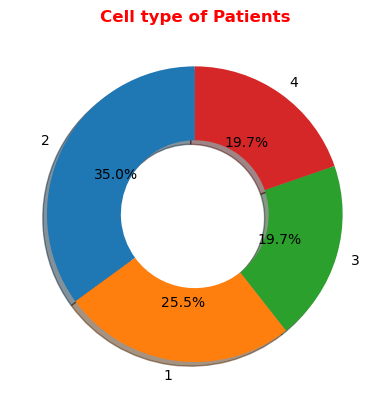

In [93]:
# Get the data
histology = data1["Cell type"].value_counts()
transactions = histology.index
quantity = histology.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops={"width": 0.5})

# Add a title
plt.title("Cell type of Patients",weight='bold',color='red')

# Show the plot
plt.show()

#### Cell type:
#### 1=squamous  25.5% 
#### 2=small cell 35.0%
#### 3=adeno 19.7%
#### 4=large 19.7% 

In [94]:
corr_matrix=data1.corr()
corr_matrix

,Treatment,Cell type,Numdays,Karnofsky score,Months,Age,Prior,Status
Treatment,1.000000,-0.011437,0.041531,-0.031964,0.011580,0.076661,-0.027421,0.027528
Cell type,-0.011437,1.000000,-0.083079,0.087704,-0.128426,-0.092978,-0.036739,0.111564
Numdays,0.041531,-0.083079,1.000000,0.381601,-0.046418,-0.068327,0.093818,0.011926
Karnofsky score,-0.031964,0.087704,0.381601,1.000000,-0.183712,-0.094985,-0.058514,-0.165087
Months,0.011580,-0.128426,-0.046418,-0.183712,1.000000,-0.033422,0.417624,0.050056
Age,0.076661,-0.092978,-0.068327,-0.094985,-0.033422,1.000000,-0.099755,0.072258
Prior,-0.027421,-0.036739,0.093818,-0.058514,0.417624,-0.099755,1.000000,-0.024123
Status,0.027528,0.111564,0.011926,-0.165087,0.050056,0.072258,-0.024123,1.000000


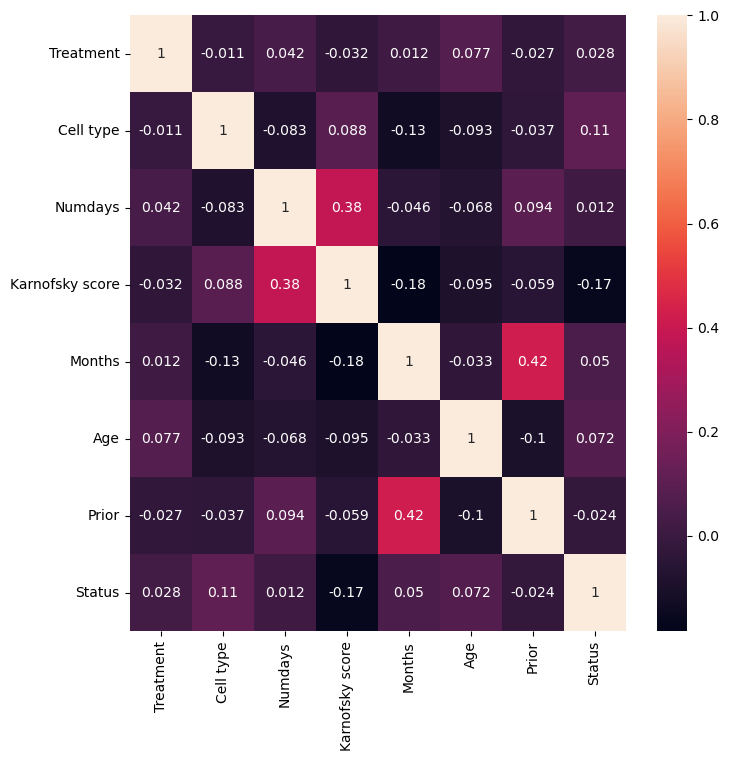

In [95]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

# 3. Prepare Data: 

### a) Data Cleaning: 

In [96]:
#Test if there is a missing value
data1.isnull().sum()

Treatment          0
Cell type          0
Numdays            0
Karnofsky score    0
Months             0
Age                0
Prior              0
Status             0
dtype: int64

# 5. Model Training: 

In [97]:
feature_cols =['Treatment','Cell type','Numdays','Karnofsky score','Months','Age','Prior'] 

In [98]:
X = data1[feature_cols] # Features
y = data1.Status # Target variable

# Data modeling

In [99]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Decision Trees:

In [100]:
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train,y_train)
  #l=[*parameter]
  #return the best parameter
  return grid_search.best_params_

In [101]:
#min_samples_split
model=tree.DecisionTreeClassifier()
parameters={'min_samples_split':list(range(10,70,10))}
best_param(model,parameters)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=10.



{'min_samples_split': 40}

In [102]:
DTM_pipline=Pipeline([
    ("clf", tree.DecisionTreeClassifier(min_samples_split=40)) #estimator
])

In [103]:
DTM_pipline.fit(X_train,y_train)

Pipeline(steps=[('clf', DecisionTreeClassifier(min_samples_split=40))])

In [104]:
y_pred = DTM_pipline.predict(X_test)

In [122]:
 mean_squared_error(DTM_pipline.predict(X_train), y_train) # MSE of train data

0.06315789473684211

In [123]:
mean_squared_error(y_pred, y_test) # MSE of test data

0.09523809523809523

In [105]:
target=['0', '1']
LR_CR=classification_report(y_test,y_pred,target_names=target)
print(LR_CR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      0.95      0.95        40

    accuracy                           0.90        42
   macro avg       0.47      0.47      0.48        42
weighted avg       0.90      0.90      0.90        42



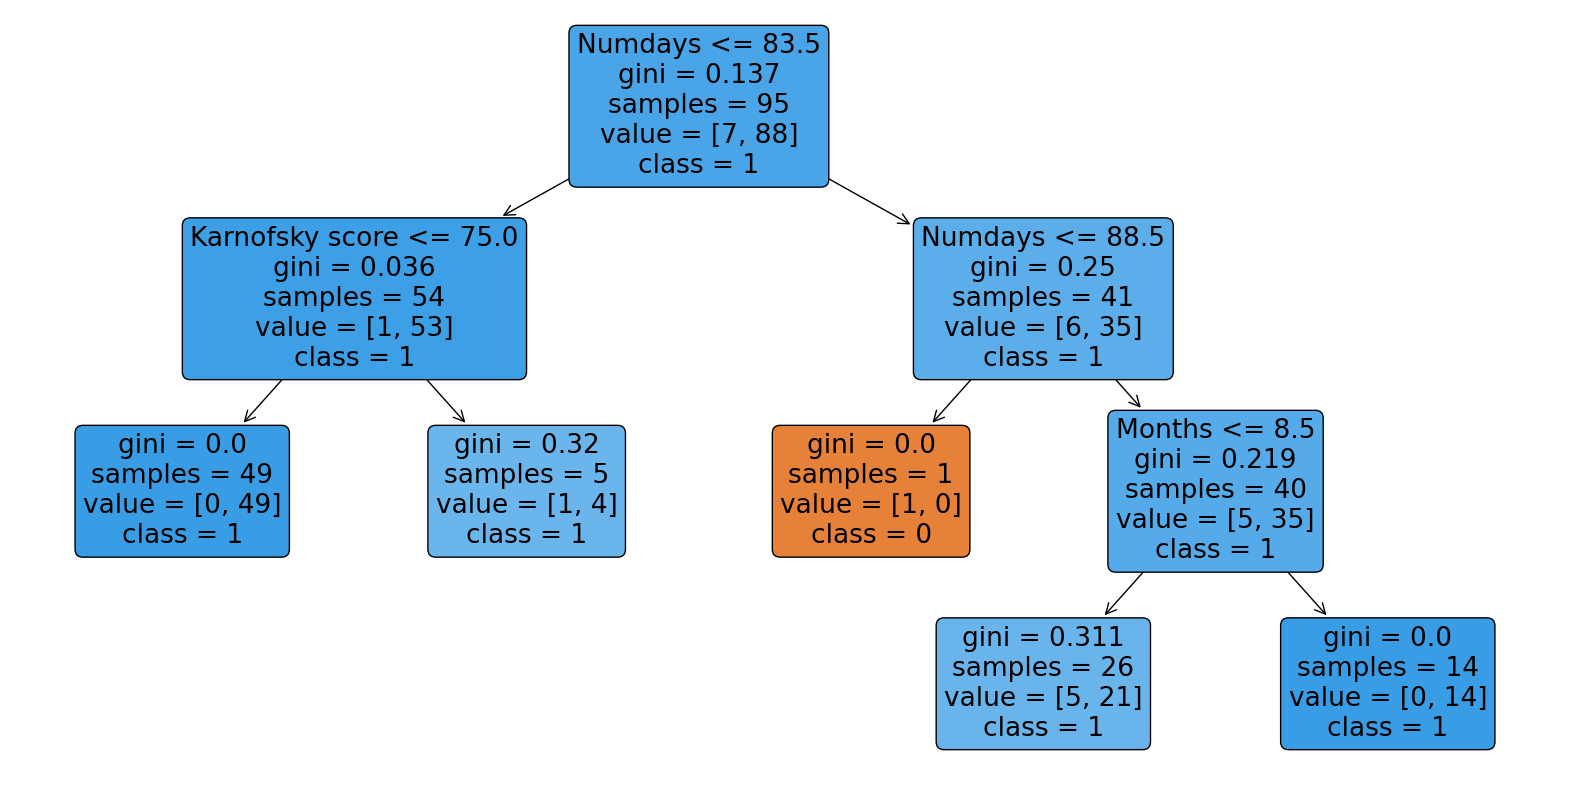

In [106]:
plt.figure(figsize=(20, 10))
tree.plot_tree(DTM_pipline.named_steps['clf'], 
         feature_names=data1.columns, 
         class_names=['0', '1'], 
         filled=True, 
         rounded=True)

plt.show()

### According to the data available to me, the most important factor that may affect whether the remaining patient is alive or not is: 
### 1)Number of days since the patient joined the study
### 2) Karnofsky score (measure of general performance, 100=best)
### 3) Months from Diagnosis
 

In [107]:
DTM_pipline.named_steps['clf'].feature_importances_

array([0.        , 0.        , 0.68523757, 0.11027288, 0.20448954,
       0.        , 0.        ])

In [110]:
cm2 = metrics.confusion_matrix(y_test,y_pred)
print(cm2)

[[ 0  2]
 [ 2 38]]


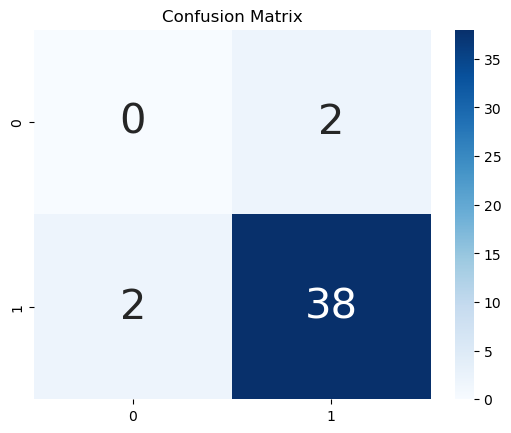

In [111]:
ax = plt.axes()
df_cm = cm2
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Logistic Regression:

In [112]:
#find the best C using grid search
#'C' is the regularization parameter, which controls the strength of regularization in the logistic regression model.
#Regularization is a technique used to prevent overfitting in machine learning models
model=LogisticRegression()
C_parms={'C':np.arange(0, 2.0, 0.01)}
best_param(model,C_parms)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=10.

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._vali

{'C': 0.01}

In [113]:
LogisticRegression_pipline=Pipeline([
    ("model", LogisticRegression(C=0.01)) #estimator
])


In [114]:
LogisticRegression_pipline.fit(X_train,y_train)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('model', LogisticRegression(C=0.01))])

In [115]:
#predict testing data
y_pred2 = LogisticRegression_pipline.predict(X_test)

In [116]:
score = LogisticRegression_pipline.score(X_test, y_test)
print(score)

0.9523809523809523


In [125]:
mean_squared_error(LogisticRegression_pipline.predict(X_train), y_train) # MSE of train data

0.07368421052631578

In [127]:
mean_squared_error(y_pred2, y_test) # MSE of test data

0.047619047619047616

In [117]:
cm2 = metrics.confusion_matrix(y_test,y_pred2)
print(cm2)

[[ 0  2]
 [ 0 40]]


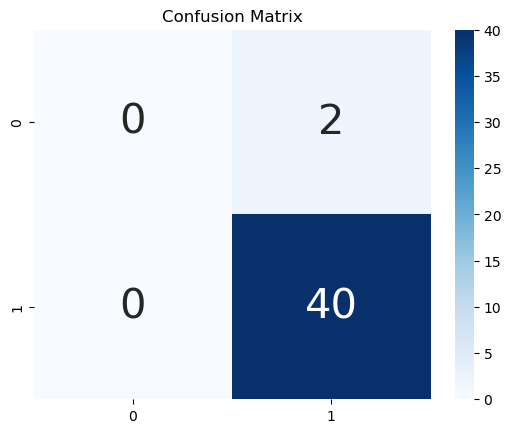

In [118]:
ax = plt.axes()
df_cm = cm2
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [81]:
target2=['0', '1']
LR_CR=classification_report(y_test,y_pred2,target_names=target2)
print(LR_CR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.98        40

    accuracy                           0.95        42
   macro avg       0.48      0.50      0.49        42
weighted avg       0.91      0.95      0.93        42



C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [80]:
#calculate the accuaracy
DTM_accuracy1=accuracy_score(y_test,y_pred2)
DTM_accuracy1

0.9523809523809523

# Training Machine Learning Model:

In [82]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [84]:
#feature_cols =['Treatment','Cell type','Numdays','Karnofsky score','Months','Age','Prior'] 
features_t = np.array([[1,1,72,60,7,69,0]])

print(model.predict(features_t))

#"the Patients are dead in dataset and the model expect will die

[1]


C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [85]:
#feature_cols =['Treatment','Cell type','Numdays','Karnofsky score','Months','Age','Prior'] 
features_t = np.array([[1,2,123,40,3,55,0
]])

print(model.predict(features_t))

#"the Patients are Alive in dataset and the model expect will die

[1]


C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

